# Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
koi_df = pd.read_csv('C:/Users/Carlos/Desktop/nasa/koi_kepler.csv')

In [4]:
pd.set_option('display.max_columns', None)
koi_df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,16/08/2018,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,616.0,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.141910,0.430,0.940,-0.000200,-0.000550,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,16/08/2018,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,875.0,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,1.111110e+31,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.141990,-0.630,1.230,0.000660,-0.001050,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,16/08/2018,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10800.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.134120,-0.021,-0.038,0.000700,0.000600,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,16/08/2018,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8080.0,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.

# Selecting and Preprocessing Accurate Data

In [5]:
df = koi_df[koi_df["koi_disposition"].isin(["CONFIRMED", "FALSE POSITIVE"])]

# Encode target
df["target"] = df["koi_disposition"].map({"CONFIRMED": 1, "FALSE POSITIVE": 0})

C:\Users\Carlos\AppData\Local\Temp\ipykernel_28028\3017281162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["koi_disposition"].map({"CONFIRMED": 1, "FALSE POSITIVE": 0})


In [6]:
koi_df.shape, df.shape, 

((9564, 83), (7585, 84))

In [11]:
# Selecting numeric columns/Variables from the dataset
X = df[["koi_period","koi_time0bk","koi_impact","koi_duration","koi_depth","koi_prad","koi_teq","koi_insol","koi_steff","koi_slogg","koi_srad","koi_kepmag"]]
y = df["target"]

In [8]:
X.shape

(7585, 12)

# Training Detection Model

In [13]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
X_train_scaled

array([[-0.41179195, -0.41839548, -0.1294038 , ..., -2.21908509,
         0.28492417, -0.70103813],
       [-0.37554759, -0.50593019,  0.17835104, ...,  0.52260032,
        -0.13444261,  0.31494405],
       [-0.44107211, -0.50618747,  0.15068385, ..., -1.29978686,
         0.21495264, -1.18541837],
       ...,
       [-0.44579417, -0.50598982, -0.22634145, ..., -0.57268448,
         0.05435721, -1.08739755],
       [-0.41252942, -0.45226588,  0.05197003, ..., -3.30742304,
         1.24664732, -0.99653154],
       [-0.42706024, -0.46734698,  0.01412404, ..., -2.34181256,
         0.40513956, -1.00726375]], shape=(6068, 12))

## Random Forest

In [23]:
# Training random Forest

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
rf_model.score(X_train_scaled, y_train)

1.0

In [24]:
# Model Evaluation

y_pred = rf_model.predict(X_test_scaled)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       968
           1       0.88      0.89      0.88       549

    accuracy                           0.92      1517
   macro avg       0.91      0.91      0.91      1517
weighted avg       0.92      0.92      0.92      1517



## Decision Trees

In [26]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
# Model Evaluation

y_pred = dt_model.predict(X_test_scaled)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       968
           1       0.77      0.88      0.82       549

    accuracy                           0.86      1517
   macro avg       0.85      0.87      0.85      1517
weighted avg       0.87      0.86      0.86      1517



In [39]:
dt_model.score(X_train_scaled, y_train)

0.8722808174027686

## XGBOOST

In [28]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train_scaled, y_train)

c:\Users\Carlos\Desktop\nasa\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [29]:
# Model Evaluation

y_pred = xgb_model.predict(X_test_scaled)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       968
           1       0.88      0.92      0.90       549

    accuracy                           0.93      1517
   macro avg       0.92      0.92      0.92      1517
weighted avg       0.93      0.93      0.93      1517



In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[902  66]
 [ 46 503]]


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


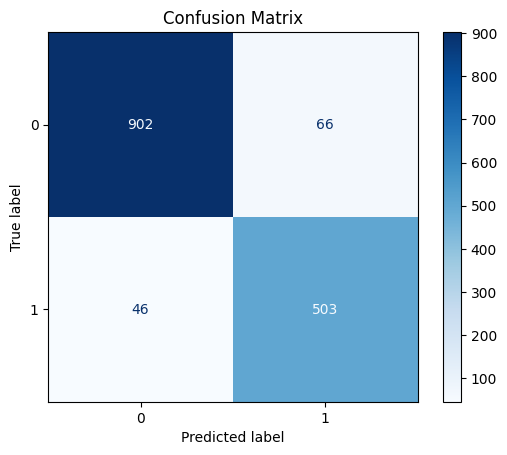

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['0','1'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()